In [1]:
!pwd

/e/floor-plan-segmentation-and-reconstruction/notebooks


### image

In [2]:
from PIL import Image

In [3]:
image=Image.open("E:/floor-plan-segmentation-and-reconstruction/dataset2/ImagesGT/1.png").convert('RGB')

In [4]:
import matplotlib.pyplot as plt

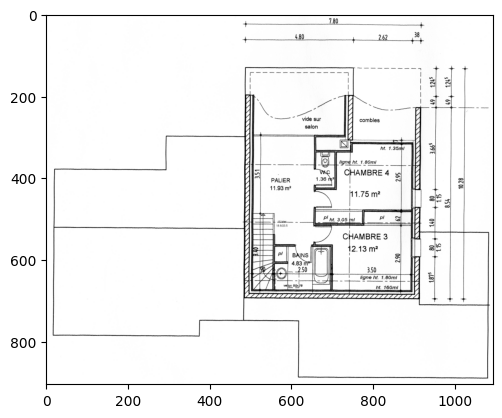

In [5]:
plt.imshow(image)

### SVG

In [6]:
from bs4 import BeautifulSoup

In [7]:
with open('E:/floor-plan-segmentation-and-reconstruction/dataset2/ImagesGT/1_gt_14.svg',mode='r',encoding='utf-8') as svg_file:
    svg_content=svg_file.read()

In [8]:
svg_content

'<?xml version="1.0" encoding="UTF-8"?><!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN" "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">\n<svg xmlns="http://www.w3.org/2000/svg" version="1.1">\n<width>1094</width>\n<height>905</height>\n<nclasslabel>50</nclasslabel>\n<nclassappear>5</nclassappear>\n<class>Bidet-1</class>\n<class>Bidet-2</class>\n<class>Bidet-3</class>\n<class>Bidet-4</class>\n<class>Door</class>\n<class>Door-1</class>\n<class>Door-23</class>\n<class>Oven-1</class>\n<class>Oven-2</class>\n<class>Oven-3</class>\n<class>Oven-4</class>\n<class>Parking</class>\n<class>Roof</class>\n<class>Room</class>\n<class>Separation</class>\n<class>Sink-1</class>\n<class>Sink-11</class>\n<class>Sink-12</class>\n<class>Sink-13</class>\n<class>Sink-14</class>\n<class>Sink-2</class>\n<class>Sink-3</class>\n<class>Sink-4</class>\n<class>Sink-5</class>\n<class>Sink-6</class>\n<class>Sofa-1</class>\n<class>Sofa-3</class>\n<class>Sofa-4</class>\n<class>Sofa-5</class>\n<class>Sofa-6</class>\n<

In [9]:
soup=BeautifulSoup(svg_content,"xml")
soup

<?xml version="1.0" encoding="utf-8"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN" "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<svg version="1.1" xmlns="http://www.w3.org/2000/svg">
<width>1094</width>
<height>905</height>
<nclasslabel>50</nclasslabel>
<nclassappear>5</nclassappear>
<class>Bidet-1</class>
<class>Bidet-2</class>
<class>Bidet-3</class>
<class>Bidet-4</class>
<class>Door</class>
<class>Door-1</class>
<class>Door-23</class>
<class>Oven-1</class>
<class>Oven-2</class>
<class>Oven-3</class>
<class>Oven-4</class>
<class>Parking</class>
<class>Roof</class>
<class>Room</class>
<class>Separation</class>
<class>Sink-1</class>
<class>Sink-11</class>
<class>Sink-12</class>
<class>Sink-13</class>
<class>Sink-14</class>
<class>Sink-2</class>
<class>Sink-3</class>
<class>Sink-4</class>
<class>Sink-5</class>
<class>Sink-6</class>
<class>Sofa-1</class>
<class>Sofa-3</class>
<class>Sofa-4</class>
<class>Sofa-5</class>
<class>Sofa-6</class>
<class>Sofa-7</class>
<class>Sofa-8</

In [10]:
image_height=soup.find('height').text
image_width=soup.find('width').text

In [11]:
image_height,image_width

('905', '1094')

In [16]:
import os

### SVG to PNG

In [15]:
import re
from xml.etree import ElementTree as ET
import cairosvg


In [ ]:
# utility
def svg_to_png_convert(svg_path:str='./data-source/dataset2/ImagesGT/1_gt_14.svg',image_path="./data-source/dataset2/ImagesGT/1.png",artifacts_path:str='./artifacts/fixed_svg_data',index=None):

    """
        Desc: A function which converts the svg to a png while perserving the original size.
        Args: file_path
        Return: None
    """

    # --- Step 1: Read the SVG ---
    with open(svg_path, "r", encoding="utf-8") as f:
        svg_data = f.read()

    # --- Step 2: Extract width & height from tags ---
    width_match = re.search(r"<width>(\d+)</width>", svg_data)
    height_match = re.search(r"<height>(\d+)</height>", svg_data)

    if not (width_match and height_match):
        raise ValueError("Width or height tag not found in SVG!")

    width = int(width_match.group(1))
    height = int(height_match.group(1))

    # --- Step 3: Parse XML and add width/height attributes ---
    root = ET.fromstring(svg_data)
    root.set("width", str(width))
    root.set("height", str(height))

    # Remove old <width> and <height> elements
    for tag in root.findall("width"):
        root.remove(tag)
    for tag in root.findall("height"):
        root.remove(tag)

    file_name=os.path.basename(svg_path)


    # --- Step 4: Write fixed SVG ---
    fixed_svg_path = f"{artifacts_path}/fixed_svg_data/{index}/{file_name}"
    fixed_svg_dir=os.path.dirname(fixed_svg_path)
    os.makedirs(fixed_svg_dir,exist_ok=True)

    ET.ElementTree(root).write(fixed_svg_path, encoding="utf-8", xml_declaration=True)

    # --- Step 5: Convert to PNG using CairoSVG ---
    png_path = f"{artifacts_path}/processed_data/{index}/{file_name.split('.')[0]}.png"
    processed_data_dir=os.path.dirname(png_path)
    os.makedirs(processed_data_dir,exist_ok=True)

    cairosvg.svg2png(url=fixed_svg_path, write_to=png_path)
    shutil  .copy(image_path,f"{artifacts_path}/processed_data/{index}")

    print(f"SVG converted to PNG successfully at {png_path}")

In [150]:
svg_to_png_convert(svg_path=r'E:/floor-plan-segmentation-and-reconstruction/data-source/dataset2/ImagesGT/image001_gt_11.svg',image_path=r"E:/floor-plan-segmentation-and-reconstruction/data-source/dataset2/ImagesGT/image001.png",artifacts_path=r'E:/floor-plan-segmentation-and-reconstruction/artifacts',index=0)

SVG converted to PNG successfully at E:/floor-plan-segmentation-and-reconstruction/artifacts/processed_data/0/image001_gt_11.png


In [151]:
import shutil

In [152]:
def data_ingestion(data_source:str=None,artifacts_path:str=None):
    files=os.listdir(data_source)

    svg_files=[]
    image_files=[]

    for file in files:
        if file.endswith('.svg'):
            svg_files.append(file)
        elif file.endswith('.png') or file.endswith('.jpg'):
            image_files.append(file)

    svg_image_pair=[]
    for svg_file in svg_files:
        parts=str(svg_file).split('_gt')
        if parts[0]+'.png' in image_files:
            svg_image_pair.append((svg_file,parts[0]+'.png'))
        elif parts[0]+'.jpg' in image_files:
            svg_image_pair.append((svg_file,parts[0]+'.jpg'))
        else:
            print(svg_file)

    for i,(svg,image) in enumerate(svg_image_pair):
        svg_path=os.path.join(data_source,svg)
        image_path=os.path.join(data_source,image)
        os.makedirs(artifacts_path+f'/raw-data/data-{i}',exist_ok=True)
        shutil.copy(svg_path,artifacts_path+f'/raw-data/data-{i}')
        shutil.copy(image_path,artifacts_path+f'/raw-data/data-{i}')

In [108]:
data_ingestion(r"E:/floor-plan-segmentation-and-reconstruction/data-source/dataset2/ImagesGT",artifacts_path=r"E:/floor-plan-segmentation-and-reconstruction/artifacts")

In [154]:
def data_preprocessing(raw_data_source,artifacts_path=None):
    folders=os.listdir(raw_data_source)
    for i,folder in enumerate(folders):
        folder_path=os.path.join(raw_data_source,folder)
        files=os.listdir(folder_path)
        file1=files[0]
        file2=files[1]
        if not file1.endswith('.svg'): # file 1 should be always .svg
            file1,file2=file2,file1
        svg_path=os.path.join(folder_path,file1)
        image_path=os.path.join(folder_path,file2)
        svg_to_png_convert(svg_path=svg_path,image_path=image_path,artifacts_path="E:/floor-plan-segmentation-and-reconstruction/artifacts",index=i)
        

In [155]:
data_preprocessing(r"E:\floor-plan-segmentation-and-reconstruction\artifacts\raw-data")

SVG converted to PNG successfully at E:/floor-plan-segmentation-and-reconstruction/artifacts/processed_data/0/10_gt_9.png
SVG converted to PNG successfully at E:/floor-plan-segmentation-and-reconstruction/artifacts/processed_data/1/1_gt_14.png
SVG converted to PNG successfully at E:/floor-plan-segmentation-and-reconstruction/artifacts/processed_data/2/Ia_AP2022_sommaire_gt_9.png
SVG converted to PNG successfully at E:/floor-plan-segmentation-and-reconstruction/artifacts/processed_data/3/image001_gt_11.png
SVG converted to PNG successfully at E:/floor-plan-segmentation-and-reconstruction/artifacts/processed_data/4/image002_gt_7.png
SVG converted to PNG successfully at E:/floor-plan-segmentation-and-reconstruction/artifacts/processed_data/5/image003_gt_3.png
SVG converted to PNG successfully at E:/floor-plan-segmentation-and-reconstruction/artifacts/processed_data/6/image005_gt_4.png
SVG converted to PNG successfully at E:/floor-plan-segmentation-and-reconstruction/artifacts/processed_da

### Creating the dataset class

In [3]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset,DataLoader

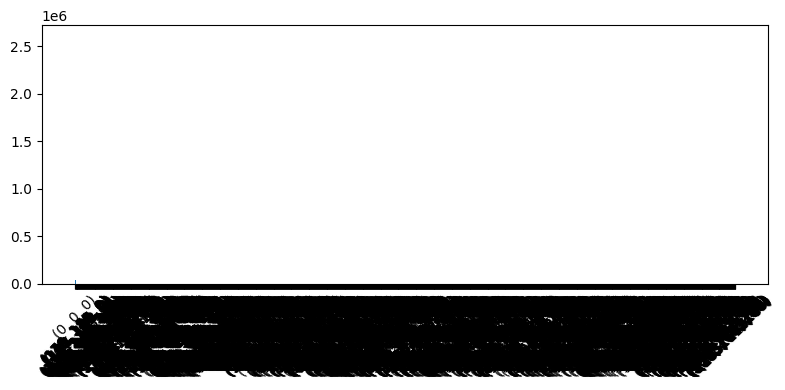

In [8]:
import torch
import torch.nn as nn 
from torch.utils.data import Dataset, DataLoader
from dataclasses import dataclass
from PIL import Image
import os
import numpy as np

@dataclass
class DatasetConfig:
    train_data_path="E:/floor-plan-segmentation-and-reconstruction/artifacts/processed-data/train"
    test_data_path="./artifacts/processed-data/test"

class CVC_FP_dataset(Dataset):
    def __init__(self,dataset_path=None):
        super().__init__()
        self.image_mask_pair_paths=self.get_image_mask_pair_paths(dataset_path)          

    @staticmethod
    def get_image_mask_pair_paths(dataset_path=None):

        list_of_image_mask_pair=[]

        directories=os.listdir(dataset_path)

        for directory in directories:
            folder_of_pair = os.path.join(dataset_path,directory)
            files=os.listdir(folder_of_pair)

            # Assuming file[0]=image and file[1]=mask
            if 'gt' in files[0]:
                files[0],files[1]=files[1],files[0]
            
            files[0]=os.path.join(folder_of_pair,files[0]).replace('\\','/')
            files[1]=os.path.join(folder_of_pair,files[1]).replace('\\','/')
            
            list_of_image_mask_pair.append((files[0],files[1]))

        return list_of_image_mask_pair
    
    @staticmethod
    def load_image_and_mask(image_path,mask_path):
        image=Image.open(image_path).convert("L")
        mask=Image.open(mask_path).convert("RGB")
        mask_np=np.array(mask)

        unique_values={}
        pixels_tuple=[tuple(y.tolist()) for x in mask_np for y in x]

        for tup in pixels_tuple:

            if tup in unique_values:
                unique_values[tup]+=1
            else:
                unique_values[tup]=1

        return image,mask,unique_values
    
    def __len__(self):
        return len(self.image_mask_pair_paths)

    def __getitem__(self, index):
        image,mask,unique_class=self.load_image_and_mask(*self.image_mask_pair_paths[index])
        return image,mask,unique_class
    

if __name__=="__main__":
    dataset=CVC_FP_dataset(DatasetConfig.train_data_path)

    import matplotlib.pyplot as plt
    counts=dataset[0][2]
    keys=[str(k) for k in counts.keys()]
    values = list(counts.values())
    plt.figure(figsize=(8,4))
    plt.bar(keys, values)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
